The dataset is involved into the analysis of depression. The data was consists as a study about the life conditions of people who live in rurales zones. Because all the columns were not explicated in this challenge so We can´t understand them. This is our total features: 

1-Surveyid 

2- Villeid

3-sex

4- Age

5- Married

6- Numberchildren 

7- educationlevel

8- totalmembers (in the family)

9- gainedasset

10- durableasset 

11- saveasset

12- livingexpenses

13- otherexpenses

14- incomingsalary 

15- incomingownfarm 

16- incomingbusiness

17- incomingnobusiness

18- incomingagricultural 

19- farmexpenses

20- laborprimary 

21- lastinginvestment

22- nolastinginvestmen

depressed: [ Zero: No depressed] or [One: depressed] (Binary for target class)
the main objective is to show statistic analysis and some data mining techniques. The dataset has 23 columns o dimensiones y un total de 1432 objetos o registros.

In [340]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [341]:
# importing all libraries required

from sklearn import metrics 
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from sklearn.metrics import confusion_matrix
import tensorflow
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample 
from tensorflow.keras.callbacks import EarlyStopping
plt.rcParams['figure.figsize'] = [12,8]
%matplotlib inline

In [342]:
df_depressed = pd.read_csv('/content/gdrive/MyDrive/assignment machine learning group 2/b_depressed.csv')

In [ ]:
print("read_csv has the shape:", df_depressed.shape)

read_csv has the shape: (1429, 23)


In [ ]:
df_depressed.head(5)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:

df_depressed.tail(5)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1428,231,12,1,33,0,4,8,5,81678391,22861940,...,0,1,0,1,20019212,16682677,0,69642126,13012488.0,0


In [ ]:
df_depressed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
df_depressed.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [ ]:
df_depressed.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [ ]:
import pandas as pd
df_depressed.groupby('sex').describe()['education_level']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
0,117.0,9.393162,2.828297,1.0,8.0,10.0,10.0,17.0
1,1312.0,8.624238,2.924651,1.0,8.0,9.0,10.0,19.0


In [ ]:
df_depressed.groupby('Married').describe()['Number_children']

,count,mean,std,min,25%,50%,75%,max
Married,,,,,,,,
0,325.0,2.098462,1.947497,0.0,0.0,2.0,3.0,9.0
1,1104.0,3.114130,1.788859,0.0,2.0,3.0,4.0,11.0


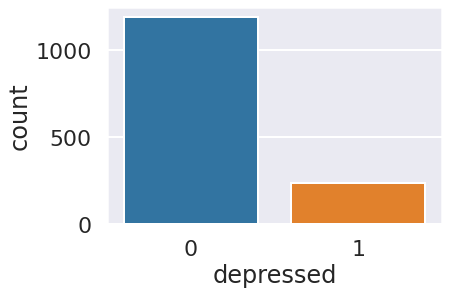

In [ ]:
sns.countplot(x='depressed',data=df_depressed)

Here we can see that there is no balance betwen the two classes so we will do the balance

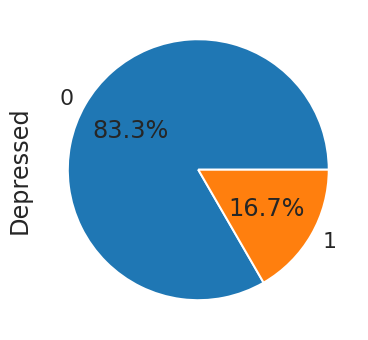

In [ ]:

sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df_depressed.groupby('depressed').size().plot(kind='pie',
                                       y = "depressed",
                                       label = "Depressed",
                                       autopct='%1.1f%%')



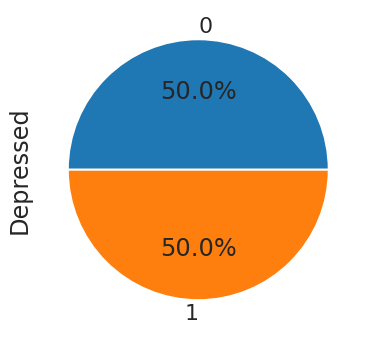

In [ ]:
test_under.groupby('depressed').size().plot(kind='pie',
                                       y = "depressed",
                                       label = "Depressed",
                                       autopct='%1.1f%%')

In [ ]:
depressed  = df_depressed[df_depressed ['depressed'] == 1]
not_depressed  = df_depressed[df_depressed ['depressed'] == 0]

In [ ]:
depressed_upsample = resample(depressed,replace=True, n_samples = len(not_depressed),random_state=24)

In [ ]:
depressed_upsample.shape

(1191, 23)

In [ ]:
test_under = pd.concat([not_depressed, depressed_upsample], axis=0)

total depressed of 1 and0: 0    1191
1    1191
Name: depressed, dtype: int64


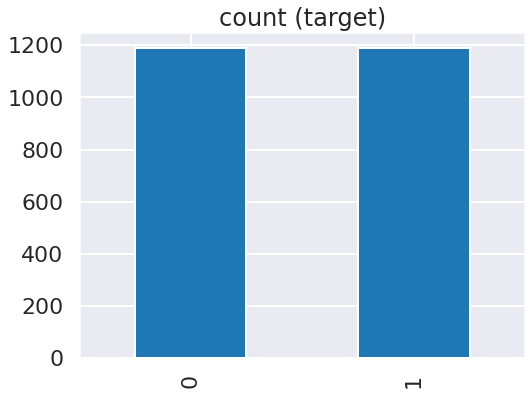

In [ ]:
print("total depressed of 1 and0:",test_under['depressed'].value_counts())# plot the count after under-sampeling
test_under['depressed'].value_counts().plot(kind='bar', title='count (target)')


In [ ]:
test_under.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2382 entries, 0 to 937
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              2382 non-null   int64  
 1   Ville_id               2382 non-null   int64  
 2   sex                    2382 non-null   int64  
 3   Age                    2382 non-null   int64  
 4   Married                2382 non-null   int64  
 5   Number_children        2382 non-null   int64  
 6   education_level        2382 non-null   int64  
 7   total_members          2382 non-null   int64  
 8   gained_asset           2382 non-null   int64  
 9   durable_asset          2382 non-null   int64  
 10  save_asset             2382 non-null   int64  
 11  living_expenses        2382 non-null   int64  
 12  other_expenses         2382 non-null   int64  
 13  incoming_salary        2382 non-null   int64  
 14  incoming_own_farm      2382 non-null   int64  
 15  incom

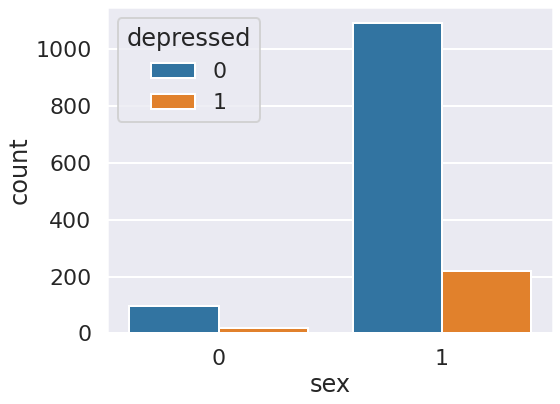

In [ ]:
sns.countplot(x='sex',data=df_depressed,hue='depressed')

In [ ]:
df_depressed.groupby('Married').describe()['education_level']

,count,mean,std,min,25%,50%,75%,max
Married,,,,,,,,
0,325.0,7.510769,3.682295,1.0,5.0,8.0,10.0,18.0
1,1104.0,9.033514,2.560202,1.0,8.0,9.0,10.0,19.0


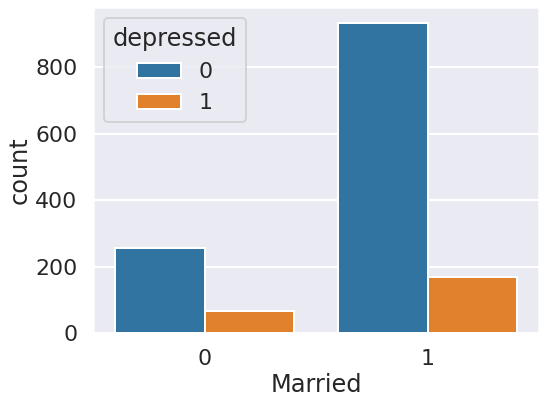

In [ ]:
sns.countplot(x='Married',data=df_depressed,hue='depressed')

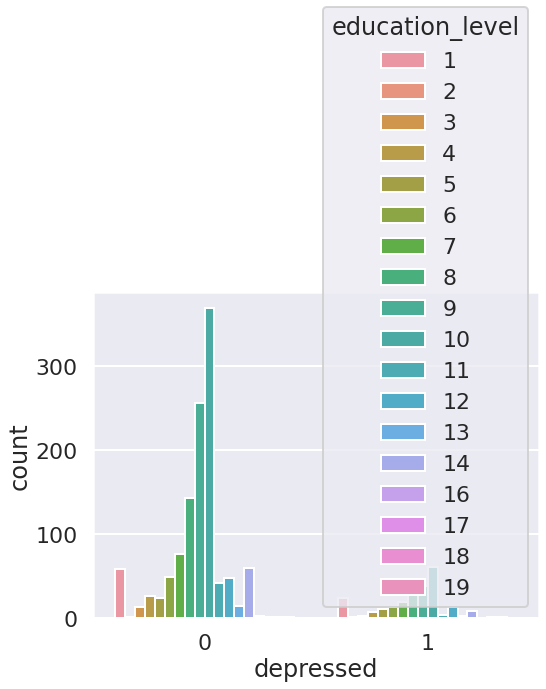

In [ ]:
sns.countplot(x='depressed',data=df_depressed,hue='education_level')

CORRELATION MATRIX

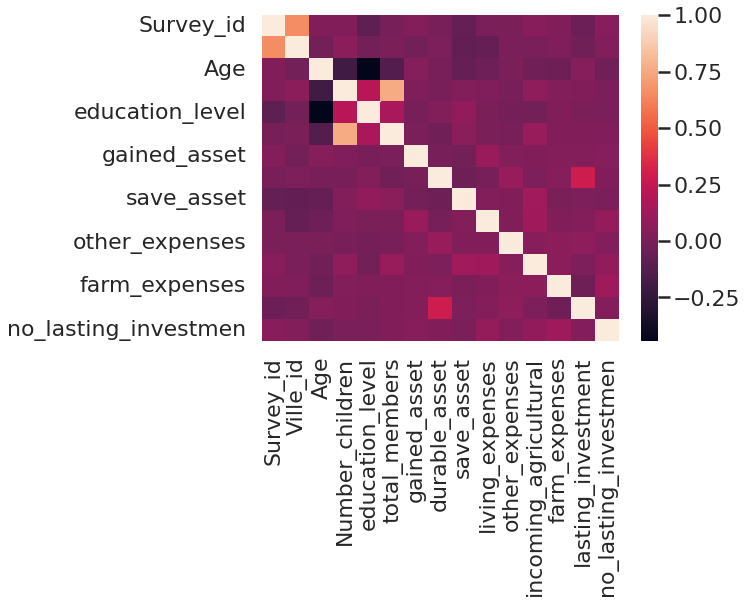

In [ ]:
sns.heatmap(test_under[['Survey_id', 'Ville_id', 'Age', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 
       'incoming_agricultural', 'farm_expenses',
       'lasting_investment', 'no_lasting_investmen']].corr())

In [ ]:
## Check for NAN value

test_under.isna().sum()



Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     31
depressed                 0
dtype: int64

In [ ]:
# Create a DataFrame from dictionary
dep_nan = pd.DataFrame(test_under)
  
#Finding the mean of the column having NaN
mean_value=dep_nan['no_lasting_investmen'].mean()
  
# Replace NaNs in column 'no_lasting_investmen' with the mean of values in the same column
dep_nan['no_lasting_investmen'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
dep_nan

Updated Dataframe:


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
5,483,25,1,35,1,6,10,8,35937466,736707,...,0,1,0,1,22688441,18907036,0,4442561,76629095.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1184,162,1,62,0,2,5,3,13252727,15054448,...,0,0,1,1,14413832,12011527,0,15462848,51382647.0,1
829,684,124,1,25,1,3,10,5,28912201,10009606,...,0,0,0,0,18684598,23578182,0,10329913,77763519.0,1
817,764,12,1,25,1,4,7,6,6712542,37556042,...,0,1,0,1,66597252,97426834,0,52916882,16159509.0,1
266,1340,78,0,73,0,3,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1


In [ ]:
## Check for NAN value after update dataframe

test_under.isna().sum()
#print('after clean')

'After removing'

'After removing'

In [ ]:
## separe input and output

df_X=test_under[['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen']]
df_Y=test_under[ 'depressed']

In [ ]:
df_X.shape

(2382, 22)

In [ ]:
df_Y.shape

(2382,)

****Data Modelling****




Building Model using Logestic Regression

Build the model

In [343]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [344]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.25, random_state=42)

In [345]:
x_test.shape

(596, 22)

In [346]:
### to normalize

x_train1 = preprocessing.scale(x_train)
x_test1 = preprocessing.scale(x_test)

In [347]:
y_train.shape

(1786,)

In [348]:

from keras import models
from keras import layers

In [349]:


from keras.layers import Flatten, BatchNormalization,Dropout

In [350]:
model = models.Sequential()
model.add(layers.Dense(250, activation='relu', input_shape=(22,)))
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [351]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 250)               5750      
                                                                 
 dense_67 (Dense)            (None, 250)               62750     
                                                                 
 dense_68 (Dense)            (None, 1)                 251       
                                                                 
Total params: 68,751
Trainable params: 68,751
Non-trainable params: 0
_________________________________________________________________


In [352]:
history = model.fit(x_train1, y_train, epochs=50, batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 11ms/step - loss: 0.6731 - accuracy: 0.5756 - val_loss: 0.6921 - val_accuracy: 0.5642
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6140 - accuracy: 0.6786 - val_loss: 0.6181 - val_accuracy: 0.6508
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5669 - accuracy: 0.7157 - val_loss: 0.5977 - val_accuracy: 0.6536
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.7311 - val_loss: 0.5620 - val_accuracy: 0.7430
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5038 - accuracy: 0.7717 - val_loss: 0.5537 - val_accuracy: 0.7291
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7962 - val_loss: 0.5215 - val_accuracy: 0.7654
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.4432 - accuracy: 0.7997 - val_loss: 0.5204 - val_accuracy: 0.7514
Epoch 8/50
23/23 [=

In [353]:
import matplotlib.pyplot as plt

acc0 = history.history['accuracy']
val_acc0 = history.history['val_accuracy']
loss0 = history.history['loss']
val_loss0 = history.history['val_loss']

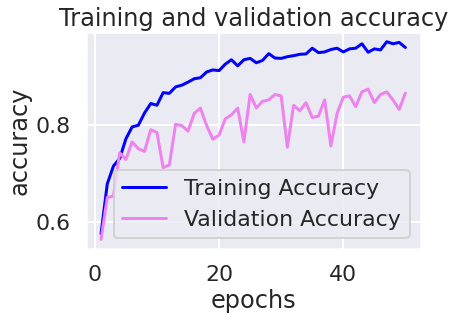

In [354]:
#plot training and validation

epochs = range(1, len(acc0) + 1)
plt.plot(epochs, acc0,color='blue',label = 'Training Accuracy')
plt.plot(epochs, val_acc0,color='violet',label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

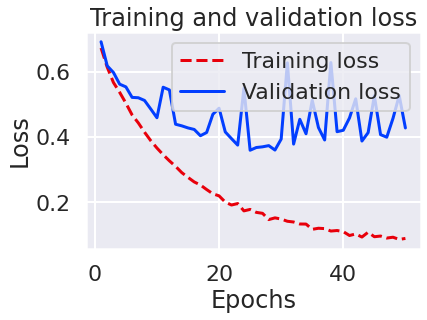

In [355]:
# plot trainingloss abd validation loss

epochs = range(1, len(acc0) + 1)
plt.plot(epochs, loss0, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss0,  'b', label = 'Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()

plt.show()

0.8640939597315436


Text(14.5, 0.5, 'True labels')

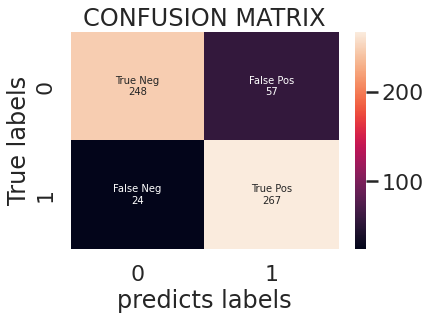

In [356]:
## prediction 

from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(x_test1)
y_pred_1 = (pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score

#cm = confusion_matrix(y_test, y_pred_1)
#print(cm)
print(accuracy_score(y_test, y_pred_1))


#print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_test, y_pred_1))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# gives the name for each group
group_names = ['True Neg','False Pos','False Neg','True Pos']

# count the number of labels of each group and save
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

# assign each value to each group
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]

# put our confusion matrix in the matrix with 2 rows and 2 columns
labels = np.asarray(labels).reshape(2,2)

#design our matrix with color
sns.heatmap(cm, annot=labels, fmt='')

plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')

** REGULARIZATION**


L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

In [357]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(250, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape = (22,)))
l2_model.add(layers.Dense(250, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [358]:
l2_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['accuracy'])

In [359]:

early_stop = EarlyStopping(monitor = 'val_loss', patience = 4)
history_l2 = l2_model.fit(x_train1, y_train, epochs=50, batch_size=64,validation_split=0.2, verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 12ms/step - loss: 0.9273 - accuracy: 0.6113 - val_loss: 0.9004 - val_accuracy: 0.5950
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.8457 - accuracy: 0.6590 - val_loss: 0.8421 - val_accuracy: 0.6508
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.7861 - accuracy: 0.7038 - val_loss: 0.8074 - val_accuracy: 0.6816
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.7441 - accuracy: 0.7311 - val_loss: 0.8287 - val_accuracy: 0.6145
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.7066 - accuracy: 0.7542 - val_loss: 0.7737 - val_accuracy: 0.6872
Epoch 6/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6737 - accuracy: 0.7801 - val_loss: 0.8013 - val_accuracy: 0.6425
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6479 - accuracy: 0.7787 - val_loss: 0.7325 - val_accuracy: 0.7291
Epoch 8/50
23/23 [=

In [360]:
import matplotlib.pyplot as plt

acc = history_l2.history['accuracy']
val_acc = history_l2.history['val_accuracy']
loss = history_l2.history['loss']
val_loss = history_l2.history['val_loss']

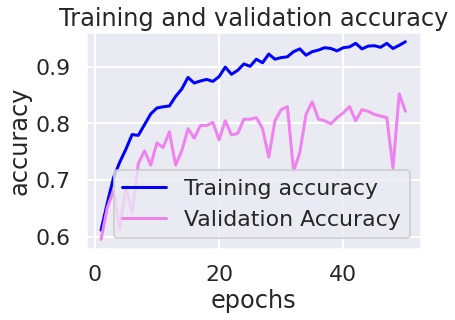

In [361]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,color='blue',label = 'Training accuracy')
plt.plot(epochs, val_acc,color='violet',label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

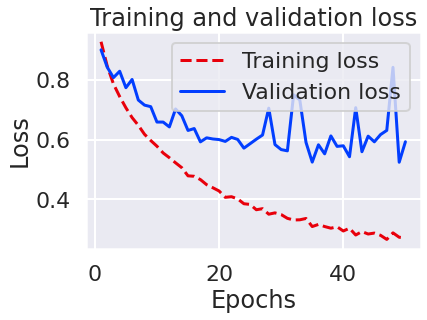

In [362]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss,  'b', label = 'Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()

plt.show()




0.8338926174496645


Text(14.5, 0.5, 'True labels')

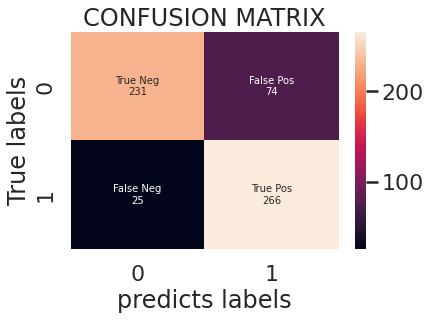

In [363]:
## prediction after regularizer 2

from sklearn.metrics import classification_report,confusion_matrix
pred2 = l2_model.predict(x_test1)
y_pred_2 = (pred2 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score

#cm = confusion_matrix(y_test, y_pred_1)
#print(cm)
print(accuracy_score(y_test, y_pred_2))


#print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_test, y_pred_1))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

# gives the name for each group
group_names = ['True Neg','False Pos','False Neg','True Pos']

# count the number of labels of each group and save
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

# assign each value to each group
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]

# put our confusion matrix in the matrix with 2 rows and 2 columns
labels = np.asarray(labels).reshape(2,2)

#design our matrix with color
sns.heatmap(cm, annot=labels, fmt='')

plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')

L1 regularization

In [386]:
l1_model = models.Sequential()
l1_model.add(layers.Dense(10, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape = (22,)))
l1_model.add(layers.Dense(10, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics = ['accuracy'])
history_l1 = l1_model.fit(x_train1, y_train, epochs=50, batch_size=64,validation_split=0.2, verbose=1)

Epoch 1/50
23/23 [==============================] - 2s 18ms/step - loss: 0.8233 - accuracy: 0.5014 - val_loss: 0.7868 - val_accuracy: 0.5363
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 0.7919 - accuracy: 0.5259 - val_loss: 0.7752 - val_accuracy: 0.5391
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.7743 - accuracy: 0.5378 - val_loss: 0.7678 - val_accuracy: 0.5587
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.7625 - accuracy: 0.5567 - val_loss: 0.7627 - val_accuracy: 0.5615
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.7527 - accuracy: 0.5833 - val_loss: 0.7579 - val_accuracy: 0.5810
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.7451 - accuracy: 0.6043 - val_loss: 0.7533 - val_accuracy: 0.5642
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.7381 - accuracy: 0.6092 - val_loss: 0.7497 - val_accuracy: 0.5726
Epoch 8/50
23/23 [=

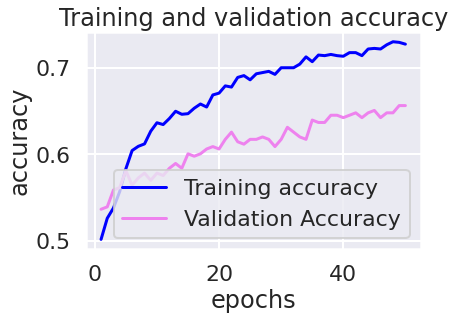

In [387]:
acc1 = history_l1.history['accuracy']
val_acc1 = history_l1.history['val_accuracy']
loss1 = history_l1.history['loss']
val_loss1 = history_l1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc1,color='blue',label = 'Training accuracy')
plt.plot(epochs, val_acc1,color='violet',label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

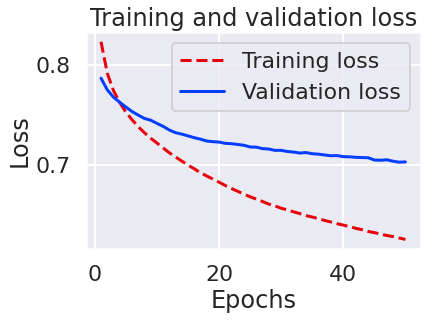

In [388]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss1, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss1,  'b', label = 'Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()

plt.show()

Dropout Layer

0.6208053691275168


Text(14.5, 0.5, 'True labels')

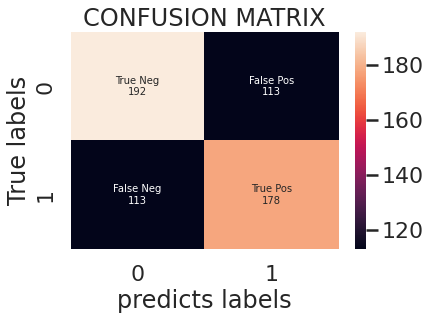

In [389]:
## prediction after regularizer 2

from sklearn.metrics import classification_report,confusion_matrix
pred3 = l1_model.predict(x_test1)
y_pred_3= (pred3 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score

#cm = confusion_matrix(y_test, y_pred_1)
#print(cm)
print(accuracy_score(y_test, y_pred_3))


#print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_test, y_pred_1))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_3)

# gives the name for each group
group_names = ['True Neg','False Pos','False Neg','True Pos']

# count the number of labels of each group and save
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

# assign each value to each group
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]

# put our confusion matrix in the matrix with 2 rows and 2 columns
labels = np.asarray(labels).reshape(2,2)

#design our matrix with color
sns.heatmap(cm, annot=labels, fmt='')

plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')

In [398]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(250, activation='relu', input_shape=(22,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(250, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model_hist = dpt_model.fit(x_train1, y_train,
                               epochs=50,
                               batch_size=64,
                               validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 2s 19ms/step - loss: 0.7097 - acc: 0.5217 - val_loss: 0.6658 - val_acc: 0.5698
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6700 - acc: 0.5938 - val_loss: 0.6557 - val_acc: 0.5810
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6710 - acc: 0.5798 - val_loss: 0.6460 - val_acc: 0.6257
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6577 - acc: 0.6078 - val_loss: 0.6335 - val_acc: 0.6508
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6386 - acc: 0.6324 - val_loss: 0.6302 - val_acc: 0.6788
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6280 - acc: 0.6225 - val_loss: 0.6277 - val_acc: 0.6620
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6084 - acc: 0.6625 - val_loss: 0.6151 - val_acc: 0.6983
Epoch 8/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6127 - acc: 0.6

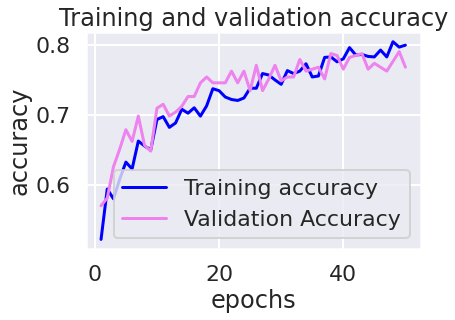

In [399]:
acc3 = dpt_model_hist.history['acc']
val_acc3 = dpt_model_hist.history['val_acc']
loss3 = dpt_model_hist.history['loss']
val_loss3 = dpt_model_hist.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc3,color='blue',label = 'Training accuracy')
plt.plot(epochs, val_acc3,color='violet',label = 'Validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

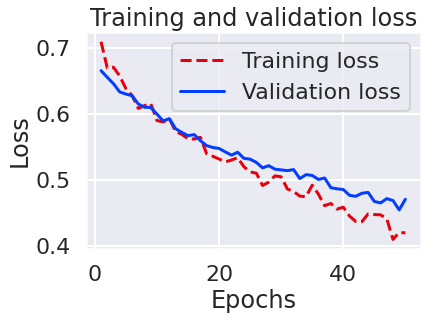

In [400]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss3, 'r--', label = 'Training loss')
plt.plot(epochs, val_loss3,  'b', label = 'Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.legend()

plt.show()

Conclusions

0.7768456375838926


Text(14.5, 0.5, 'True labels')

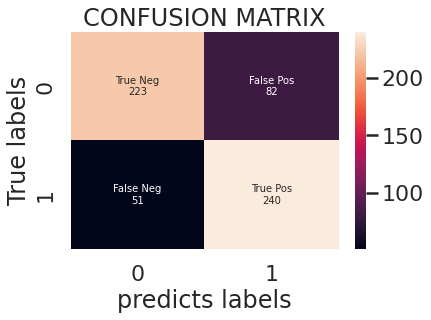

In [401]:
## prediction after regularizer 2

from sklearn.metrics import classification_report,confusion_matrix
pred4 = dpt_model.predict(x_test1)
y_pred_4= (pred4 > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score

#cm = confusion_matrix(y_test, y_pred_1)
#print(cm)
print(accuracy_score(y_test, y_pred_4))


#print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_test, y_pred_1))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred_4)

# gives the name for each group
group_names = ['True Neg','False Pos','False Neg','True Pos']

# count the number of labels of each group and save
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

# assign each value to each group
labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]

# put our confusion matrix in the matrix with 2 rows and 2 columns
labels = np.asarray(labels).reshape(2,2)

#design our matrix with color
sns.heatmap(cm, annot=labels, fmt='')

plt.title('CONFUSION MATRIX')
plt.xlabel('predicts labels')
plt.ylabel('True labels')